In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from pathlib import Path
import pandas as pd
from ecephys_analyses.data import paths

from ecephys import sglx_utils


In [58]:
# Check duration of catgt concatenated data

In [77]:
subj='Adrian'
cond = '9-1-2021_imec0'
stim_paths = [
#     '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX11-Adrian/9-1-2021_imec0/stim_times_t0.csv',
#     '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX11-Adrian/9-1-2021_imec0/stim_times_t1.csv',
]

raw_binpaths = paths.get_sglx_style_datapaths(
    subj, cond, 'ap.bin', catgt_data=False, root_key='raw_chronic'
)
cat_binpaths = paths.get_sglx_style_datapaths(
    subj, cond, 'ap.bin', catgt_data=True, root_key='catgt'
)
assert len(cat_binpaths) == 1
assert cat_binpaths[0].exists()

In [78]:
cat_binpaths[0]

PosixPath('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX11-Adrian/9-1-2021_g0_imec0/9-1-2021/catgt_9-1-2021_g0/9-1-2021_g0_imec0/9-1-2021_g0_tcat.imec0.ap.bin')

In [79]:
float(sglx_utils.get_meta(cat_binpaths[0])['fileTimeSecs'])

no meta file


KeyError: 'fileTimeSecs'

In [80]:
sum([float(sglx_utils.get_meta(path)['fileTimeSecs']) for path in raw_binpaths])

12489.66070637746

In [71]:
subj='Giuseppe'
cond = '12-27-2020_g1_imec1'
stim_paths = [
#     '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX11-Adrian/9-1-2021_imec0/stim_times_t0.csv',
#     '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX11-Adrian/9-1-2021_imec0/stim_times_t1.csv',
]

raw_binpaths = paths.get_sglx_style_datapaths(
    subj, cond, 'ap.bin', catgt_data=False, root_key='raw_chronic'
)
cat_binpaths = paths.get_sglx_style_datapaths(
    subj, cond, 'ap.bin', catgt_data=True, root_key='catgt'
)
assert len(cat_binpaths) == 1
assert cat_binpaths[0].exists()

In [72]:
cat_binpaths

[PosixPath('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX7-Giuseppe/12-27-2020_g1_imec1/12-27-2020/catgt_12-27-2020_Stim1-3_g1/12-27-2020_Stim1-3_g1_imec1/12-27-2020_Stim1-3_g1_tcat.imec1.ap.bin')]

In [73]:
cat_binpaths[0]

PosixPath('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX7-Giuseppe/12-27-2020_g1_imec1/12-27-2020/catgt_12-27-2020_Stim1-3_g1/12-27-2020_Stim1-3_g1_imec1/12-27-2020_Stim1-3_g1_tcat.imec1.ap.bin')

In [74]:
float(sglx_utils.get_meta(cat_binpaths[0])['fileTimeSecs'])

7591.385996116273

In [76]:
sum([float(sglx_utils.get_meta(path)['fileTimeSecs']) for path in raw_binpaths])

7591.3860294496035

# Stim_times.txt

In [ ]:
### Allan

In [ ]:
# simple conditions

In [ ]:
conditions =  [
#     '3-5-2021_g0_imec0',
#     '3-5-2021_g0_imec1',
    '3-5-2021_g2_imec0',
    '3-5-2021_g2_imec1',
    '3-5-2021_g3_imec0',
    '3-5-2021_g3_imec1',
#     '3-5-2021_g4_imec0',
#     '3-5-2021_g4_imec1',
#     '3-5-2021_g5_imec0',
#     '3-5-2021_g5_imec1',
#     '3-5-2021_g6_imec0',
#     '3-5-2021_g6_imec1',
]
print(conditions)


In [ ]:
for cond in conditions:
    path = paths.get_datapath('Allan', cond, 'dummy')
    print(path.parent)
    path.parent.mkdir()

In [ ]:
# Combined

In [ ]:
combined_cond = '3-5-2021_g2-3_imec1'
conditions =  paths.load_datapath_yaml()['Allan'][combined_cond]
print(conditions)


In [ ]:
dfs = []
start_time = 0
for cond in conditions:
    print(cond, 'start time', start_time)
    path = paths.get_datapath('Allan', cond, 'stim_times.csv')
    df = pd.read_csv(path)
    df['sglx_stim_time'] = df['sglx_stim_time'] + start_time
    dfs.append(df)
    binpaths = paths.get_sglx_style_datapaths('Allan', cond, 'ap.bin', catgt_data=True)
    assert len(binpaths) == 1
    start_time += float(sglx_utils.get_meta(binpaths[0])['fileTimeSecs'])
df_combined = pd.concat(dfs)
    
#     end_time 
#     df
#     print(path.exists())
#     print(path)
    

In [ ]:
save_path = paths.get_datapath('Allan', combined_cond, 'stim_times.csv')
save_path

In [ ]:
df_combined.to_csv(save_path, index=False)

In [ ]:
### EUGENE

In [ ]:
eugene = pd.read_excel('Eugene.xlsx', engine='openpyxl')

In [ ]:
eugene.columns

In [ ]:
eugene.columns = 'datapath', 'state', 'depth', 'stimpath', 'N_trials', 'trials_reordered_BL'

In [ ]:
eugene['datapath'][0:1].values

In [ ]:
conditions = paths.get_conditions('Eugene', 'eStim')

In [ ]:
eugene[0:10]

In [ ]:
# add condition dir to run path

for cond in conditions: 
    pathname = paths.get_sglx_style_datapaths('Eugene', cond, 'ap.bin')[0]
    rundir = pathname.parents[1]
    run = rundir.name
    for i, row in eugene.iterrows():
        path = row['datapath']
        assert rundir not in eugene.columns or eugene.iloc[i, 'rundir'] is None 
        if run in path:
            eugene.loc[i, 'rundir'] = rundir
            eugene.loc[i, 'condition'] = cond.split('_imec')[0]

In [ ]:
eugene['condition']

In [ ]:
import numpy as np

# for i, row in eugene.iterrows():
for cond in conditions:
    for i, row in eugene.iterrows():
        if row['condition'] not in cond:
            continue
        stimpath = row['stimpath'].split('CNPIX6-Eugene')[1].replace('\\', '/').replace("'", '')

        stimpath = Path('/Volumes/neuropixel/Data/CNPIX6-Eugene' + stimpath)
    #     print(stimpath, stimpath.exists())

        stim_times = pd.read_csv(stimpath, header=None)

        df = pd.DataFrame({'sglx_stim_time': np.concatenate(stim_times.values), 'stim_state': row['state']})
        print(df[0:5])

    #     dfpath = path.get_filename()
        df_path = paths.get_datapath('Eugene', cond, 'stim_times.csv')
        print(df_path)

        df.to_csv(df_path, index=False)

    #     if i > 3:
    #         break
    #     stimtimes = 

In [ ]:
### Alessandro

In [ ]:
aless = pd.read_excel('Alessandro stim location.xlsx', engine='openpyxl')

In [ ]:
aless.columns

In [ ]:
aless.columns = 'datapath', 'state', 'depth', 'stimpath', 'N_trials', 'trials_reordered_BL'

In [ ]:
aless['datapath'][0:1].values

In [ ]:
conditions = paths.get_conditions('Alessandro', 'eStim')

In [ ]:
aless[0:10]

In [ ]:
# add condition dir to run path

for cond in conditions: 
    pathname = paths.get_sglx_style_datapaths('Alessandro', cond, 'ap.bin')[0]
    rundir = pathname.parents[1]
    run = rundir.name
    for i, row in aless.iterrows():
        path = row['datapath']
        assert rundir not in aless.columns or aless.iloc[i, 'rundir'] is None 
        if run in path:
            aless.loc[i, 'rundir'] = rundir
            aless.loc[i, 'condition'] = cond

In [ ]:
aless

In [ ]:
aless['condition']

In [ ]:
aless['rundir'][0]

In [ ]:
aless['stimpath'][0]

In [ ]:
import numpy as np

# for i, row in eugene.iterrows():
for cond in conditions:
    for i, row in aless.iterrows():
        if row['condition'] not in cond:
            continue
        stimpath = row['stimpath'].split('CNPIX5-Alessandro')[1].replace('\\', '/').replace("'", '')

        stimpath = Path('/Volumes/neuropixel/Data/CNPIX5-Alessandro' + stimpath)
        print(stimpath, stimpath.exists())

        stim_times = pd.read_csv(stimpath, header=None)

        df = pd.DataFrame({'sglx_stim_time': np.concatenate(stim_times.values), 'stim_state': row['state']})
        print(df[0:5])

    #     dfpath = path.get_filename()
        df_path = paths.get_datapath('Alessandro', cond, 'stim_times.csv')
        print(df_path)

        df_path.parent.mkdir()
        df.to_csv(df_path, index=False)

    #     if i > 3:
    #         break
    #     stimtimes = 

In [ ]:
# Giuseppe Combined

In [ ]:
combined_cond = '8-31-2020_REMmerged_imec0'
conditions =  paths.load_datapath_yaml()['Alessandro'][combined_cond]
# conds = paths.get_sglx_style_datapaths('Giuseppe', '12-27-2020_Wake_NREM_REM_depth1.5_imec0', 'dummy')
print(conditions)

In [ ]:
# dfs = []
# start_time = 0
# for cond in conditions:
#     path = (paths.get_datapath('Alessandro', cond, 'stim_times.csv'))
#     df = pd.read_csv(path)
#     df['sglx_stim_time'] = df['sglx_stim_time'] + start_time
#     dfs.append(df)
# #     binpaths = paths.get_sglx_style_datapaths('Giuseppe', cond, 'ap.bin', catgt_data=True)
#     assert len(binpaths) == 1
#     start_time = float(sglx_utils.get_meta(binpaths[0])['fileTimeSecs'])
# df_combined = pd.concat(dfs)
# df_combined
    
# #     end_time 
# #     df
# #     print(path.exists())
# #     print(path)
    

In [ ]:
# Giuseppe

In [ ]:
# Combined

In [82]:
# combined_cond = '12-27-2020_Wake_NREM_REM_depth1.5_imec0'
combined_cond = '12-27-2020_imec1'
conditions =  paths.load_datapath_yaml()['Giuseppe'][combined_cond]
# conds = paths.get_sglx_style_datapaths('Giuseppe', '12-27-2020_Wake_NREM_REM_depth1.5_imec0', 'dummy')
# conds
print(conditions)

['12-27-2020_g0_imec1', '12-27-2020_g1_imec1']


In [85]:
dfs = []
start_time = 0
for cond in conditions:
#     path = (paths.get_sglx_style_datapaths('Giuseppe', cond, 'dummy', catgt_data=False, root_key='eStim')[0].parents[1])/'stim_times.csv'
    path = paths.get_datapath('Giuseppe', cond, 'stim_times.csv', root_key='eStim')
    print(path)
    df = pd.read_csv(path)
    df.columns = [
        c.replace('stim_times', 'sglx_stim_time').replace('state', 'stim_state')
        for c in df.columns
    ]
    print(df[0:5], len(df), start_time)
    df['sglx_stim_time'] = df['sglx_stim_time'] + start_time
    dfs.append(df)
    binpaths = paths.get_sglx_style_datapaths('Giuseppe', cond, 'ap.bin', catgt_data=True)
    assert len(binpaths) == 1
    start_time += float(sglx_utils.get_meta(binpaths[0])['fileTimeSecs'])
df_combined = pd.concat(dfs)
    
#     end_time 
#     df
#     print(path.exists())
#     print(path)
    

/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX7-Giuseppe/12-27-2020_g0_imec1/stim_times.csv
   sglx_stim_time stim_state
0      148.802219          N
1      168.802028          N
2      178.802178          N
3      188.802329          N
4      268.802548          N 245 0
/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX7-Giuseppe/12-27-2020_g1_imec1/stim_times.csv
   sglx_stim_time stim_state
0      107.070523          W
1      117.070347          W
2      137.070651          W
3      147.070476          W
4      157.070628          W 55 7061.4953452484615


In [87]:
save_path = paths.get_datapath('Giuseppe', combined_cond, 'stim_times.csv', root_key='eStim')
save_path

PosixPath('/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX7-Giuseppe/12-27-2020_imec1/stim_times.csv')

In [88]:
df_combined.to_csv(save_path, index=False)

In [ ]:
# Adrian. concatenate t0 and t1

In [16]:
cond = '9-1-2021_imec0'
stim_paths = [
    '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX11-Adrian/9-1-2021_imec0/stim_times_t0.csv',
    '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX11-Adrian/9-1-2021_imec0/stim_times_t1.csv',
]

In [17]:
bin_paths = paths.get_sglx_style_datapaths('Adrian', cond, 'ap.bin', catgt_data=False, root_key='raw_chronic')

In [18]:
bin_paths

[PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX11-Adrian/9-1-2021/9-1-2021_g0/9-1-2021_g0_imec0/9-1-2021_g0_t0.imec0.ap.bin'),
 PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX11-Adrian/9-1-2021/9-1-2021_g0/9-1-2021_g0_imec0/9-1-2021_g0_t1.imec0.ap.bin')]

In [36]:
assert len(bin_paths) == len(stim_paths)

dfs = []
start_time = 0
for i in range(len(bin_paths)):
    stim_path = stim_paths[i]
    bin_path = bin_paths[i]
    df = pd.read_csv(stim_path)
    print(len(df), start_time)
    df['sglx_stim_time'] = df['sglx_stim_time'] + start_time
    dfs.append(df)
    start_time += float(sglx_utils.get_meta(bin_path)['fileTimeSecs'])
df_combined = pd.concat(dfs)
    
#     end_time 
#     df
#     print(path.exists())
#     print(path)
    

189 0
123 7199.999991386681


In [37]:
df_combined

,sglx_stim_time,stim_state
0,307.655850,Wake
1,347.758797,Wake
2,386.195826,Wake
3,421.839067,Wake
4,431.618963,Wake
...,...,...
118,8653.017945,REM
119,8660.849464,REM
120,8666.955755,REM
121,8674.849860,REM


In [33]:
save_path = paths.get_datapath('Adrian', cond, 'stim_times.csv', root_key='eStim')
save_path

PosixPath('/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX11-Adrian/9-1-2021_imec0/stim_times.csv')

In [38]:
df_combined.to_csv(save_path, index=False)

In [ ]:
# Charles. concatenate g3-6

In [112]:
cond = '7-14-2021_imec1'
stim_paths = [
    '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX10-Charles/7-14-2021_imec1/stim_times_g3-g6_tom-g3.csv',
    '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX10-Charles/7-14-2021_imec1/stim_times_g3-g6_tom-g4.csv',
    '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX10-Charles/7-14-2021_imec1/stim_times_g3-g6_tom-g5.csv',
    '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX10-Charles/7-14-2021_imec1/stim_times_g3-g6_tom-g6.csv',
]

In [113]:
bin_paths = paths.get_sglx_style_datapaths('Charles', cond, 'ap.bin', catgt_data=False, root_key='raw_chronic')

In [114]:
bin_paths

[PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX10-Charles/7-14-2021/7-14-2021_g3/7-14-2021_g3_imec1/7-14-2021_g3_t0.imec1.ap.bin'),
 PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX10-Charles/7-14-2021/7-14-2021_g4/7-14-2021_g4_imec1/7-14-2021_g4_t0.imec1.ap.bin'),
 PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX10-Charles/7-14-2021/7-14-2021_g5/7-14-2021_g5_imec1/7-14-2021_g5_t0.imec1.ap.bin'),
 PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX10-Charles/7-14-2021/7-14-2021_g6/7-14-2021_g6_imec1/7-14-2021_g6_t0.imec1.ap.bin')]

In [115]:
assert len(bin_paths) == len(stim_paths)

dfs = []
start_time = 0
for i in range(len(bin_paths)):
    stim_path = stim_paths[i]
    bin_path = bin_paths[i]
    df = pd.read_csv(stim_path)
    df.columns = [
        c.replace('stim_times', 'sglx_stim_time').replace('state', 'stim_state')
        for c in df.columns
    ]
    
    print(df[0:5], len(df), start_time)
    df['sglx_stim_time'] = df['sglx_stim_time'] + start_time
    dfs.append(df)
    start_time = start_time + float(sglx_utils.get_meta(bin_path)['fileTimeSecs'])
df_combined = pd.concat(dfs)
    
#     end_time 
#     df
#     print(path.exists())
#     print(path)
    

   sglx_stim_time stim_state
0      310.940164        NaN
1      334.794684        NaN
2      350.823416        NaN
3      360.159311        NaN
4      394.689112        NaN 110 0
   sglx_stim_time stim_state
0      840.716945        NaN
1      958.103109        NaN
2      970.105982          N
3     2448.412639          R
4     4434.221274          N 154 5124.036964092644
   sglx_stim_time stim_state
0     1076.725529        NaN
1     1079.646131          R
2     1082.739418        NaN
3     1189.230765          R
4     1196.988560          R 45 12295.780870408336
   sglx_stim_time stim_state
0     1142.288360        NaN
1     1148.288159          S
2     1154.288285          S
3     1160.288084          S
4     1166.288211          S 100 14561.997573430126


In [116]:
float(sglx_utils.get_meta(bin_path)['fileTimeSecs'])

1823.817023930207

In [117]:
df_combined

,sglx_stim_time,stim_state
0,310.940164,NaN
1,334.794684,NaN
2,350.823416,NaN
3,360.159311,NaN
4,394.689112,NaN
...,...,...
95,16274.282221,S
96,16280.282347,S
97,16286.282146,S
98,16292.282272,S


In [118]:
df_combined.groupby('stim_state').count()

,sglx_stim_time
stim_state,
N,83
R,104
S,99
W,87


In [119]:
save_path = paths.get_datapath('Charles', cond, 'stim_times.csv', root_key='eStim')
save_path

PosixPath('/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX10-Charles/7-14-2021_imec1/stim_times.csv')

In [120]:
df_combined.to_csv(save_path, index=False)

In [ ]:
# Allan. concatenate g2-g3

In [121]:
subj = 'Allan'
cond = '3-5-2021_g2-3_imec1'
stim_paths = [
    '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX8-Allan/3-5-2021_g2_imec1/stim_times_tom_g2.csv',
    '/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX8-Allan/3-5-2021_g3_imec1/stim_times_tom_g3.csv',
]

In [122]:
bin_paths = paths.get_sglx_style_datapaths('Allan', cond, 'ap.bin', catgt_data=False, root_key='raw_chronic')

In [123]:
bin_paths

[PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX8-Allan/3-5-2021/3-5-2021_g2/3-5-2021_g2_imec1/3-5-2021_g2_t0.imec1.ap.bin'),
 PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX8-Allan/3-5-2021/3-5-2021_g3/3-5-2021_g3_imec1/3-5-2021_g3_t0.imec1.ap.bin')]

In [124]:
assert len(bin_paths) == len(stim_paths)

dfs = []
start_time = 0
for i in range(len(bin_paths)):
    stim_path = stim_paths[i]
    bin_path = bin_paths[i]
    df = pd.read_csv(stim_path)
    df.columns = [
        c.replace('stim_times', 'sglx_stim_time').replace('state', 'stim_state')
        for c in df.columns
    ]
    
    print(df[0:5], len(df), start_time)
    df['sglx_stim_time'] = df['sglx_stim_time'] + start_time
    dfs.append(df)
    start_time = start_time + float(sglx_utils.get_meta(bin_path)['fileTimeSecs'])
df_combined = pd.concat(dfs)
    
#     end_time 
#     df
#     print(path.exists())
#     print(path)
    

   sglx_stim_time stim_states
0      348.814932           W
1      809.522402           W
2      816.434488           W
3      823.104745           W
4      832.188693           W 65 0
   sglx_stim_time stim_states
0     1788.169566           W
1     1796.680401           W
2     1950.648761           W
3     2018.312736           W
4     2040.640203           W 164 1087.0443558685154


In [125]:
float(sglx_utils.get_meta(bin_paths[0])['fileTimeSecs'])

1087.0443558685154

In [129]:
df_combined

,sglx_stim_time,stim_states
0,348.814932,W
1,809.522402,W
2,816.434488,W
3,823.104745,W
4,832.188693,W
...,...,...
159,2701.332114,R
160,2709.751527,R
161,2717.155131,R
162,2725.713480,R


In [130]:
df_combined.groupby('stim_states').count()

,sglx_stim_time
stim_states,
N,102
R,47
W,80


In [127]:
save_path = paths.get_datapath(subj, cond, 'stim_times.csv', root_key='eStim')
save_path

PosixPath('/Volumes/neuropixel_analysis/Data/tom/catgt/CNPIX8-Allan/3-5-2021_g2-3_imec1/stim_times.csv')

In [128]:
df_combined.to_csv(save_path, index=False)

# Copy concatenated hypnograms to condition dir

In [3]:
from pathlib import Path
import pandas as pd
from ecephys_analyses.data import paths
from ecephys import scoring


In [4]:
condition_groups = [
#     ('Doppio', 'SD'),
#     ('Allan', 'SD'),
#     ('Luigi', 'SD'),
#     ('Segundo', 'SD_catgt'),
    ('Alessandro', 'SD_catgt'),
    
]

data_conditions = []
for subject, condition_group in condition_groups:
    data_conditions += [
        (subject, cond)
        for cond in paths.get_conditions(subject, condition_group)
    ]
print(f'Data condition N={len(data_conditions)} (Looks good?): {data_conditions}')

Data condition N=2 (Looks good?): [('Alessandro', 'baseline-sleep-2h-circadian-match_imec0'), ('Alessandro', 'recovery-sleep-2h_imec0')]


In [14]:
for subject, condition in data_conditions:
    assert not is_combined_condition(subject, condition)
    hyp_paths = paths.get_hypno_datapaths(subject, condition)
    print(subject, condition)
    for prb in ['imec0', 'imec1']:
        try:
            print(f'Try loading hyp saved for {prb}...', end='')
            imec_hyp_paths = [
                Path(str(p).replace('imec0', 'imec1').replace('imec1', prb))
                for p in hyp_paths
            ]
            print(imec_hyp_paths)
            if len(imec_hyp_paths) > 1:
                print("MULTIPLE HYPNOGRAMS???? ARE YOU SURE?")
#             assert len(imec_hyp_paths) == 1
            hyp = scoring.load_consecutive_visbrain_hypnograms(
                imec_hyp_paths
            )
            found=True
            print('Found it!')
            break
        except FileNotFoundError:
            print('not found')
            found=False
            continue
    if not found:
        print('NOT FOUND :( :( :(')
        continue
    print("Save in condition dir")
    savepath = paths.get_datapath(subject, condition, 'hypnogram.csv', root_key='eStim')
    savepath.parent.mkdir(exist_ok=True)
    print(savepath)
    hyp.to_csv(savepath, index=False)
    print("Done")
    print('\n\n')
        

AssertionError: 

In [6]:
imec_hyp_paths

[PosixPath('/Volumes/neuropixel_analysis/Data/CNPIX5-Alessandro/8-24-2020/8-24-2020_g0/8-24-2020_g0_imec0/8-24-2020_g0_t6.imec0.hypnogram.txt'),
 PosixPath('/Volumes/neuropixel_analysis/Data/CNPIX5-Alessandro/8-24-2020/8-24-2020_g0/8-24-2020_g0_imec0/8-24-2020_g0_t7.imec0.hypnogram.txt')]

In [9]:
# hyp = scoring.load_consecutive_visbrain_hypnograms(
#     paths.get_hypno_datapaths('Allan', 'baseline-sleep-2h-circadian-match_imec1')
# )

In [10]:
# hyp

,state,end_time,start_time,duration
0,N2,59.990002,0.000000,59.990002
1,IS,77.989998,59.990002,17.999996
2,REM,101.989998,77.989998,24.000000
3,Trans,107.989998,101.989998,6.000000
4,Arousal,125.989998,107.989998,18.000000
...,...,...,...,...
136,Trans,7109.979980,7091.979980,18.000000
137,Wake,7145.979980,7109.979980,36.000000
138,Trans,7163.979980,7145.979980,18.000000
139,Arousal,7175.979980,7163.979980,12.000000


# Change format of hypnogram  (hypnogram.txt to hypnogram.csv in same dir)

In [ ]:
root = Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX10-Charles/recovery-sleep-2h_imec0/')
src_filename = 'hypnogram.txt'
tgt_filename = 'hypnogram.csv'

hyp = scoring.load_visbrain_hypnogram(root/src_filename)
hyp.to_csv(root/tgt_filename, index=False)




# Copy concatenated hypnograms to "multiple" condition dir

In [11]:
from pathlib import Path
import pandas as pd
from ecephys_analyses.data import paths
from ecephys import scoring


In [12]:
condition_groups = [
#     ('Doppio', 'SD'),
#     ('Allan', 'SD'),
#     ('Luigi', 'SD'),
#     ('Charles', 'SD'),
#     ('Segundo', 'SD'),
    ('Alessandro', 'SD'),
]

root_key = 'sleep-homeostasis'

data_conditions = []
for subject, condition_group in condition_groups:
    data_conditions += [
        (subject, cond)
        for cond in paths.get_conditions(subject, condition_group)
    ]
print(f'Data condition N={len(data_conditions)} (Looks good?): {data_conditions}')

Data condition N=1 (Looks good?): [('Alessandro', 'sleep-homeostasis-2h_imec0')]


In [13]:
from ecephys_analyses.data.paths import get_subconditions, is_combined_condition
from ecephys.scoring import load_consecutive_csv_hypnograms

for subject, condition in data_conditions:

    if is_combined_condition(subject, condition):
        subconditions = get_subconditions(subject, condition)
        hyp = load_consecutive_csv_hypnograms(
            [
                paths.get_datapath(subject, subcondition, 'hypnogram.csv', root_key=root_key)
                 for subcondition in subconditions
            ],
            conditions = subconditions,
        )
        print("Save in condition dir")
        savepath = paths.get_datapath(subject, condition, 'hypnogram.csv', root_key=root_key)
        savepath.parent.mkdir(exist_ok=True)
        print(savepath)
        hyp.to_csv(savepath, index=False)
        print("Done")
        
    # subconditions = get_subconditions('Doppio', 'baseline-sleep-2h-circadian-match_imec1')
    else:
        print(f"Pass {subject} {condition}: Not 'combined' condition")


Save in condition dir
/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX5-Alessandro/sleep-homeostasis-2h_imec0/hypnogram.csv
Done


In [16]:
hyp

,state,end_time,start_time,duration,condition
0,N2,19.990000,0.000000,19.990000,baseline-sleep-2h-circadian-match_imec0
1,Wake,27.990000,19.990000,8.000000,baseline-sleep-2h-circadian-match_imec0
2,N2,67.989998,27.990000,39.999998,baseline-sleep-2h-circadian-match_imec0
3,N1,79.989998,67.989998,12.000000,baseline-sleep-2h-circadian-match_imec0
4,Wake,87.989998,79.989998,8.000000,baseline-sleep-2h-circadian-match_imec0
...,...,...,...,...,...
108,REM,14087.959961,14079.959961,8.000000,recovery-sleep-2h_imec0
109,N1,14095.959961,14087.959961,8.000000,recovery-sleep-2h_imec0
110,REM,14155.959961,14095.959961,60.000000,recovery-sleep-2h_imec0
111,N1,14187.959961,14155.959961,32.000000,recovery-sleep-2h_imec0


# Channel depths

In [2]:
from pathlib import Path

In [4]:
# metapath = Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX4-Doppio/3-17-2020/catgt_3-17-2020_g0/3-17-2020_g0_imec0/3-17-2020_g0_tcat.imec0.ap.meta')
metapath = Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX4-Doppio/baseline-sleep-2h-circadian-match_imec0/3-17-2020/catgt_3-17-2020_g0/3-17-2020_g0_imec0/3-17-2020_g0_tcat.imec0.ap.meta')

In [7]:
from ecephys_analyses.data.utils import depth_from_channel

depth_from_channel(metapath, [1, 29, 30, 81, 82, 153, 154, 200, 201, 298, 299, 374])
# (array([286]),)
# (array([175]),)
# (array([290]

0
1 0.0
2 20.0
3 40.0
4 60.0
5 80.0
6 100.0
7 120.0
8 140.0
9 160.0
10 180.0
11 200.0
12 220.0
13 240.0
14 260.0
15 280.0
16 300.0
17 320.0
18 340.0
19 360.0
20 380.0
21 400.0
22 420.0
23 440.0
24 460.0
25 480.0
26 500.0
27 520.0
28 540.0
29 560.0
30 580.0
31 600.0
32 620.0
33 640.0
34 660.0
35 680.0
36 700.0
37 720.0
38 740.0
39 760.0
40 780.0
41 800.0
42 820.0
43 840.0
44 860.0
45 880.0
46 900.0
47 920.0
48 940.0
49 960.0
50 980.0
51 1000.0
52 1020.0
53 1040.0
54 1060.0
55 1080.0
56 1100.0
57 1120.0
58 1140.0
59 1160.0
60 1180.0
61 1200.0
62 1220.0
63 1240.0
64 1260.0
65 1280.0
66 1300.0
67 1320.0
68 1340.0
69 1360.0
70 1380.0
71 1400.0
72 1420.0
73 1440.0
74 1460.0
75 1480.0
76 1500.0
77 1520.0
78 1540.0
79 1560.0
80 1580.0
81 1600.0
82 1620.0
83 1640.0
84 1660.0
85 1680.0
86 1700.0
87 1720.0
88 1740.0
89 1760.0
90 1780.0
91 1800.0
92 1820.0
93 1840.0
94 1860.0
95 1880.0
96 1900.0
97 1920.0
98 1940.0
99 1960.0
100 1980.0
101 2000.0
102 2020.0
103 2040.0
104 2060.0
105 2080.0
106 210

array([   0.,  560.,  580., 1600., 1620., 3040., 3060., 3980., 4000.,
       5940., 5960., 7460.])

In [8]:
from ecephys.units.io import get_cluster_info


In [10]:
df = get_cluster_info(Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX4-Doppio/sleep-homeostasis-2h_imec0/ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1'))

In [41]:
df = get_cluster_info(Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX10-Charles/sleep-homeostasis-2h_imec1/ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1'))

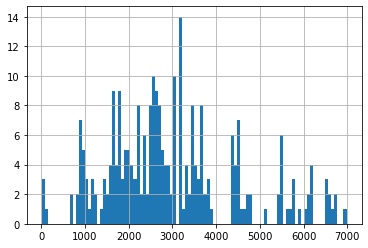

In [19]:
df.depth.hist(bins=100)

In [44]:
df.columns

Index(['cluster_id', 'Unnamed: 1', 'Amplitude', 'ContamPct', 'KSLabel', 'amp',
       'amplitude_cutoff', 'ch', 'cumulative_drift', 'd_prime', 'depth',
       'epoch_name', 'firing_rate', 'fr', 'group', 'isi_viol',
       'isolation_distance', 'l_ratio', 'max_drift', 'n_spikes', 'nn_hit_rate',
       'nn_miss_rate', 'presence_ratio', 'sh', 'silhouette_score'],
      dtype='object')

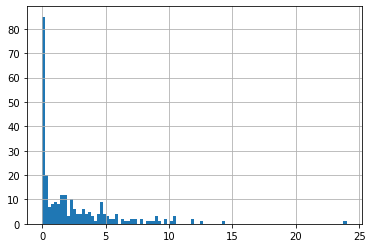

In [45]:
df.fr.hist(bins=100)

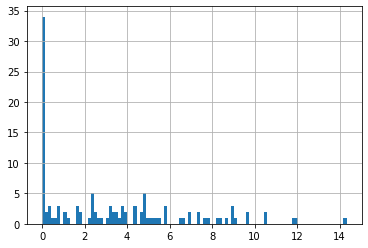

In [48]:
df[
    (df['isi_viol'] < 0.5)
    & (df['depth'] > 800)
    & (df['depth'] < 3800)
].fr.hist(bins=100)